In [5]:
from plotnine.data import economics
from plotnine import ggplot, aes, geom_histogram, scale_y_log10
from matplotlib.pyplot import imshow
%matplotlib inline

In [6]:
from astropy.io import fits

In [7]:
file = '/Users/egomez/Downloads/lcogtdata-20211007-1/tfn0m410-kb98-20211002-0093-e91.fits.fz'
hdul = fits.open(file)

In [8]:
fldata = hdul[1].data.flatten()

In [9]:
import numpy as np
from pandas import DataFrame

0.08888407


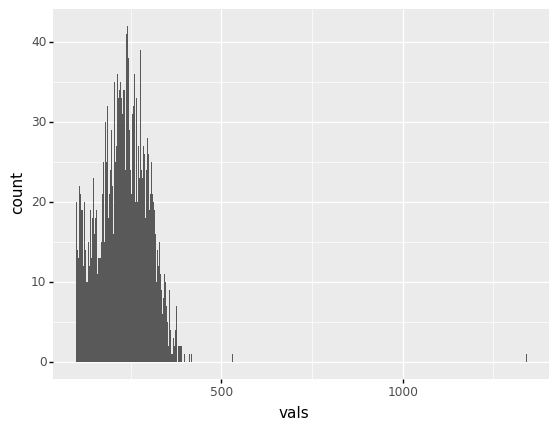

<ggplot: (8790550379210)>

In [18]:
print(np.median(fldata))
data = fldata[fldata>100]
df = DataFrame(data={'vals':data})
(
    ggplot(df, aes(x='vals'))
    + geom_histogram(bins=1000)
)



In [21]:
hist = np.histogram(data, bins=1000)
hist[1][np.max(hist[0])]

152.21025

In [12]:
from scipy.stats import norm
mu, std = norm.fit(hist[0])
x = np.linspace(hist[1],100)

In [13]:
q = norm.pdf(x, mu, std)
df1 = DataFrame(data={'x':x,'y':q})
(
    ggplot(df1)
    + aes(x="x", y="y")
    + geom_line()
)

ValueError: If using all scalar values, you must pass an index

In [22]:
from PIL import Image

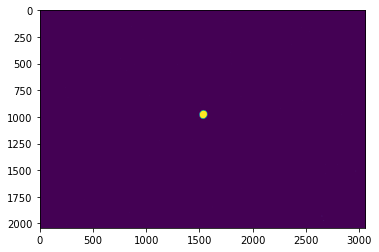

In [32]:
im = Image.fromarray(data).convert('L')
pdata = hdul[1].data
pdata[pdata<100]=0.
pdata = pdata -100.
imshow(pdata)